# Workflow for pre-processing data for machine learning

### Import modules

In [1]:
import xarray as xr
import glob
import os
import matplotlib
import pandas.plotting
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


Set output path and PPE specification

In [2]:
path = "/scratch/globc/dcom/ARPEGE6_TUNE"

In [3]:
ds=xr.open_mfdataset(path+'/PRE623TUN010*.nc',concat_dim='ensemble',combine='nested')

In [4]:
print('ds size in GB {:0.2f}\n'.format(ds.nbytes / 1e9))

ds size in GB 37.94



In [5]:
ds.info()

xarray.Dataset {
dimensions:
	ensemble = 9 ;
	lat = 128 ;
	lon = 256 ;
	plev = 28 ;
	time = 120 ;

variables:
	float32 plev(plev) ;
		plev:units = Pa ;
		plev:standard_name = air_pressure ;
		plev:long_name = pressure ;
		plev:axis = Z ;
		plev:positive = down ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:axis = X ;
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:axis = Y ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:axis = T ;
	float32 prlic(ensemble, time, lat, lon) ;
		prlic:long_name = Convective rain rate ;
		prlic:units = kg m-2 s-1 ;
		prlic:comment = accumulated values ;
		prlic:valid_min = 0.0 ;
	float32 prsnc(ensemble, time, lat, lon) ;
		prsnc:long_name = Convective snowfall rate ;
		prsnc:units = kg m-2 s-1 ;
		prsnc:comment = accumulated values ;
		prsnc:valid_min = 0.0 ;
	float32 pr

In [6]:
da_mean = ds['tall']

In [7]:
da_mean

<xarray.DataArray 'tall' (ensemble: 9, time: 120, lat: 128, lon: 256)>
dask.array<concatenate, shape=(9, 120, 128, 256), dtype=float32, chunksize=(1, 120, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 1.40625 2.8125 ... 355.78125 357.1875 358.59375
  * lat      (lat) float32 -88.927734 -87.538704 ... 87.538704 88.927734
  * time     (time) datetime64[ns] 2005-01-16 2005-02-15 ... 2014-12-17
Dimensions without coordinates: ensemble
Attributes:
    long_name:  Lowest atmosphere level temperature
    units:      K
    comment:    instantaneous values

In [8]:
da_emn = da_mean.mean(dim='ensemble')


In [9]:
da_emn.isel(time=1)

<xarray.DataArray 'tall' (lat: 128, lon: 256)>
dask.array<getitem, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 1.40625 2.8125 ... 355.78125 357.1875 358.59375
  * lat      (lat) float32 -88.927734 -87.538704 ... 87.538704 88.927734
    time     datetime64[ns] 2005-02-15

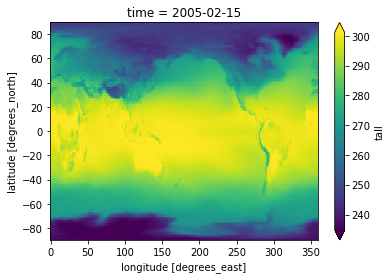

In [10]:
da_emn.isel(time=1).plot(robust='true')


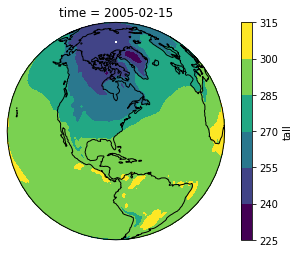

In [12]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
da_emn.isel(time=1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),robust='true');
ax.set_global(); ax.coastlines();

In [17]:
coslat = np.cos(np.deg2rad(ds.lat)).where(~ds.tall.isnull())


In [18]:
weights = coslat / coslat.sum(dim=('lat', 'lon'))


In [19]:
gmts=sla_timeseries_weighted = (ds.tall * weights).sum(dim=('lat', 'lon'))

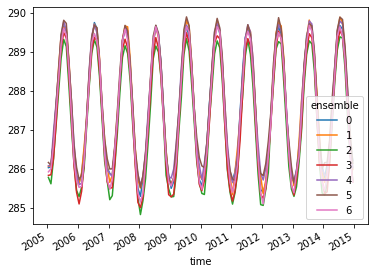

In [23]:
gmts.isel(ensemble=slice(2,10)).plot.line(x='time')








